In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import *
from catboost import CatBoostRegressor
import warnings as w
w.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
answer = pd.read_csv("../data/4.체감안전도_통계(2017~2019).csv")

In [4]:
sub = pd.read_csv("../data/25.결과제출양식.csv")
pol_order = list(sub['경찰서명'])

for i in range(len(pol_order)):
    pol_order[i] = "jur_stn_"+pol_order[i]
    pol_order[i] = pol_order[i].replace(" ","")

In [23]:
tqq = pd.read_csv("q2_train.csv")#,index_col=0)

In [5]:
train_data = pd.read_csv("q2_train.csv")#,index_col=0)
target_data = pd.read_csv("q2_target.csv")#,index_col=0)

target_data.reset_index(drop=True,inplace=True)

In [6]:
train_data = pd.get_dummies(train_data)
target_data = pd.get_dummies(target_data)

target_data['상반기'] =target_data['date_2020(상반기)']
del target_data['date_2020(상반기)'],target_data['date_2020(하반기)']

train_data['상반기'] = ( train_data['date_2018(상반기)'] | train_data['date_2019(상반기)'] )
del train_data['date_2018(상반기)'],train_data['date_2018(하반기)'],train_data['date_2019(상반기)'],train_data['date_2019(하반기)']

for i in pol_order:
    del train_data[i]

In [7]:
tar_sang = target_data[target_data['상반기']==1]
tar_ha = target_data[target_data['상반기']!=1]

tar_sang.reset_index(drop=True,inplace=True)
tar_ha.reset_index(drop=True,inplace=True)

# del tar_sang['jur_stn']
# del tar_sang['date']
# del tar_ha['jur_stn']
# del tar_ha['date']

In [8]:
for i in pol_order:
    del tar_sang[i],tar_ha[i]

In [9]:
X = train_data
y = train_data['mur_safety_q2']
del X['mur_safety_q2']

In [10]:
model = CatBoostRegressor(iterations=3500,silent=True,learning_rate=0.005072).fit(X, y)

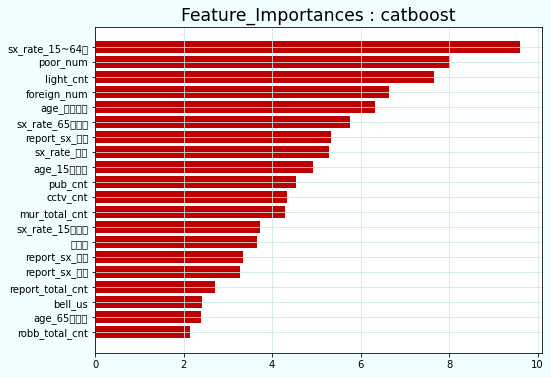

In [11]:
impotances = model.feature_importances_
feature_list = list(zip(model.feature_importances_,X.columns))
feature_list.sort(reverse=True)
feature_list=feature_list[:20]
feature_list.sort(reverse=False)
feature_df = pd.DataFrame(feature_list,columns=["score","feature"])
plt.figure(figsize=(8,6),facecolor="#F0FDFF")
plt.title("Feature_Importances : {}".format(str(model).split('.')[0].split('<')[-1]), fontsize="xx-large")
plt.barh(feature_df["feature"],feature_df["score"],color="#C00000")
plt.grid(color="#CFE8E1")

In [12]:
X.isnull().sum().sum()

0

In [13]:
df = pd.DataFrame(list(zip(model.feature_importances_,X.columns)))
df.columns = ['weight','columns']
df.sort_values(['weight'],axis=0,ascending=False)

,weight,columns
13,9.608759,sx_rate_15~64세
5,8.019986,poor_num
18,7.654050,light_cnt
15,6.650299,foreign_num
10,6.320454,age_평균연령
14,5.764741,sx_rate_65세이상
4,5.336711,report_sx_여성
11,5.289204,sx_rate_합계
7,4.915581,age_15세미만
0,4.546408,pub_cnt


In [31]:
df['columns']

0              pub_cnt
1     report_total_cnt
2         report_sx_남성
3         report_sx_불상
4         report_sx_여성
5             poor_num
6               age_합계
7            age_15세미만
8           age_15~64세
9            age_65세이상
10            age_평균연령
11          sx_rate_합계
12       sx_rate_15세미만
13      sx_rate_15~64세
14       sx_rate_65세이상
15         foreign_num
16            cctv_cnt
17             bell_us
18           light_cnt
19      robb_total_cnt
20       mur_total_cnt
21                 상반기
Name: columns, dtype: object

In [33]:
# col_num = 5
# row=103
# print(tqq.loc[row,'jur_stn'])
# tester = (X.loc[row,:]).copy()
# target_col_value = X.columns[col_num]
# print("- 타겟 피쳐 : ",target_col_value,"\n- 값 : ", tester[target_col_value])
# print("- 기존 만족도 : ",y[row])
# print("- Feature Importance : ",model.feature_importances_[col_num])
# target_var_value = 1.1
# tester[target_col_value] = tester[target_col_value] * target_var_value
# print("- 수치 10% 증가 시 예측 만족도 : ",model.predict(np.array(tester)))
# print("* 변화량 : ",(model.predict(np.array(tester))-y[row]))

In [14]:
pred = (model.predict(tar_ha)* 0.90525 + model.predict(tar_sang) * 0.10525)

In [15]:
prediction = pd.Series(pred)

In [16]:
prediction.to_csv("q2_result.csv")